In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
file="/content/claimants.csv"

In [ ]:
df=pd.read_csv(file)
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
correlation=df['ATTORNEY'].corr(df['LOSS'])
correlation

-0.2197150271023389

In [ ]:
correlation=df['ATTORNEY'].corr(df['CLMSEX'])
correlation

0.07967388309782608

In [ ]:
correlation=df['ATTORNEY'].corr(df['SEATBELT'])
correlation

-0.0571885205932261

In [ ]:
correlation=df['ATTORNEY'].corr(df['CLMINSUR'])
correlation

0.07943879930146744

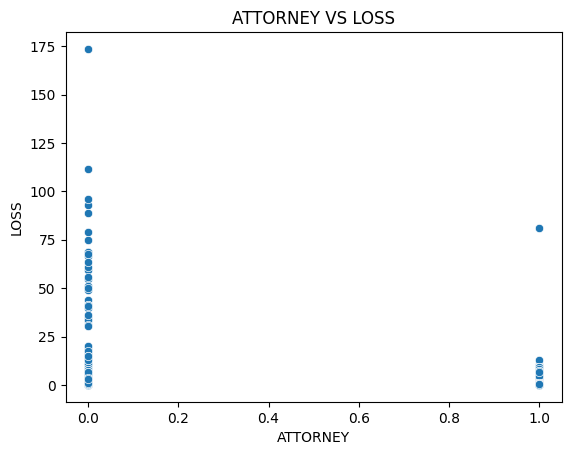

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='ATTORNEY',y='LOSS',data=df)

plt.title('ATTORNEY VS LOSS')
plt.xlabel('ATTORNEY')
plt.ylabel('LOSS')
plt.show()

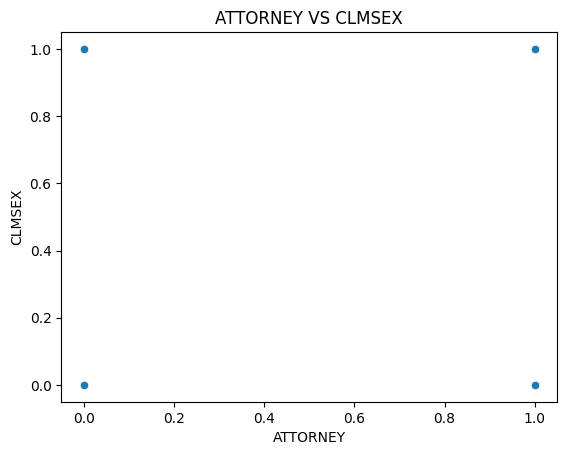

In [ ]:
sns.scatterplot(x='ATTORNEY',y='CLMSEX',data=df)

plt.title('ATTORNEY VS CLMSEX')
plt.xlabel('ATTORNEY')
plt.ylabel('CLMSEX')
plt.show()

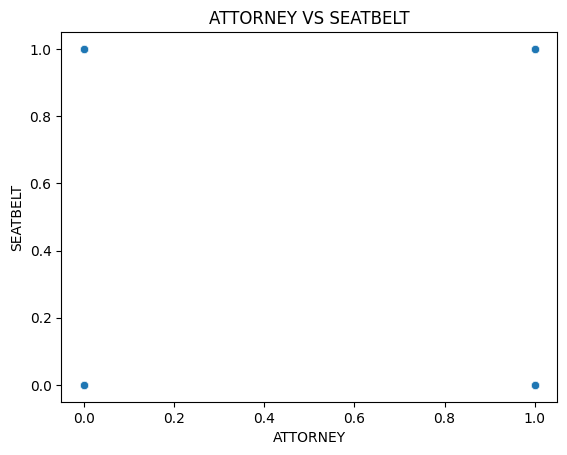

In [ ]:
sns.scatterplot(x='ATTORNEY',y='SEATBELT',data=df)

plt.title('ATTORNEY VS SEATBELT')
plt.xlabel('ATTORNEY')
plt.ylabel('SEATBELT')
plt.show()

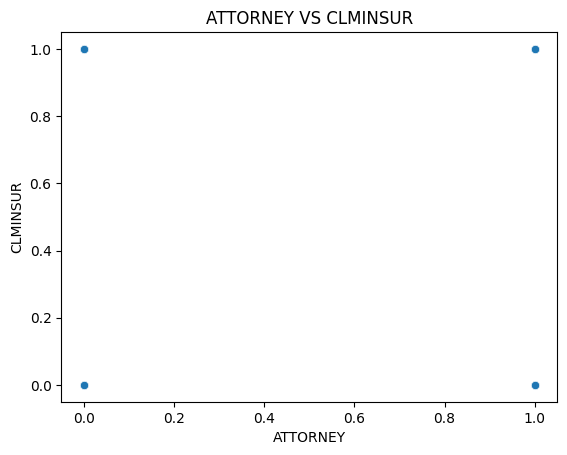

In [ ]:
sns.scatterplot(x='ATTORNEY',y='CLMINSUR',data=df)

plt.title('ATTORNEY VS CLMINSUR')
plt.xlabel('ATTORNEY')
plt.ylabel('CLMINSUR')
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
claimants=pd.read_csv(file)
claimants.drop(['CASENUM'],axis=1,inplace=True)
claimants=claimants.dropna()
print(claimants)

x=claimants.iloc[:,[1,2,3,4,5]]
y=claimants.iloc[:,0]
print(y)
model=LogisticRegression(max_iter=300)
model.fit(x,y)
dump(model,open('Logistic_Model.sav','wb'))

loaded_model=load(open('Logistic_Model.sav','rb'))
result=loaded_model.score(x,y)
print(result)

      ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0            0     0.0       1.0       0.0    50.0  34.940
1            1     1.0       0.0       0.0    18.0   0.891
2            1     0.0       1.0       0.0     5.0   0.330
3            0     0.0       1.0       1.0    31.0   0.037
4            1     0.0       1.0       0.0    30.0   0.038
...        ...     ...       ...       ...     ...     ...
1334         1     1.0       1.0       0.0    16.0   0.060
1336         0     1.0       1.0       0.0    46.0   3.705
1337         1     1.0       1.0       0.0    39.0   0.099
1338         0     1.0       0.0       0.0     8.0   3.177
1339         1     1.0       1.0       0.0    30.0   0.688

[1096 rows x 6 columns]
0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64
0.708029197080292


In [ ]:
pip install streamlit

In [ ]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LogisticRegression

st.title('Model Deployment: Logistic Regression')

st.sidebar.header('User Input Parameters')

def user_input_features():
    CLMSEX = st.sidebar.selectbox('Gender', ('1', '0'))
    CLMINSUR = st.sidebar.selectbox('Insurance', ('1', '0'))
    SEATBELT = st.sidebar.selectbox('Seatbelt', ('1', '0'))
    CLMAGE = st.sidebar.number_input("Insert the Age")
    LOSS = st.sidebar.number_input("Insert Loss")

    data = {
        'CLMSEX': CLMSEX,
        'CLMINSUR': CLMINSUR,
        'SEATBELT': SEATBELT,
        'CLMAGE': CLMAGE,
        'LOSS': LOSS
    }

    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()
st.subheader('User Input Parameters')
st.write(df)

claimants = pd.read_csv('claimants.csv')
claimants.drop(['CASENUM'], inplace=True, axis=1)
claimants = claimants.dropna()

x= claimants.iloc[:,[1,2,3,4,5]]
y= claimants.iloc[:,0]
clf = LogisticRegression()
clf.fit(x,y)

prediction = clf.predict(df)
prediction_proba = clf.predict_proba(df)

st.subheader('Predicted Result')
st.write('Yes' if prediction_proba[0][1] > 0.5 else 'No')
st.write('Probability of Yes:', prediction_proba[0][1])
st.write('Probability of No:', prediction)



2025-03-04 03:58:31.994 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 03:58:32.258 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-04 03:58:32.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 03:58:32.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 03:58:32.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 03:58:32.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 03:58:32.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 03:58:32.267 Thread 'MainThread': mi

In [ ]:
streamlit run streamlet_deploy_logistic_regression.py

SyntaxError: invalid syntax (<ipython-input-22-557f0114a73a>, line 1)

In [ ]:
streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py

In [ ]:
!pip install streamlit localtunnel


ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel
